In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus']=False    #显示负号

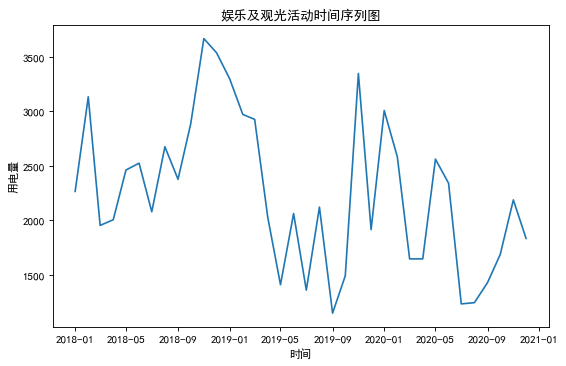

In [41]:
#娱乐及观光活动原始数据时序图
df = pd.read_excel('娱乐及观光活动时间序列.xlsx')
df['月份'] = pd.to_datetime(df['月份'],format='%Y%m') #数字转换为年月日
fig,ax = plt.subplots(figsize = (8,5) , dpi = 80)
ax.plot(df["月份"] , df["电量"])
ax.set(xlabel = "时间" , ylabel = "用电量" ,title = "娱乐及观光活动时间序列图")
plt.show()
             #df['月份'].values.astype('datetime64[M]') #返回年月格式日期

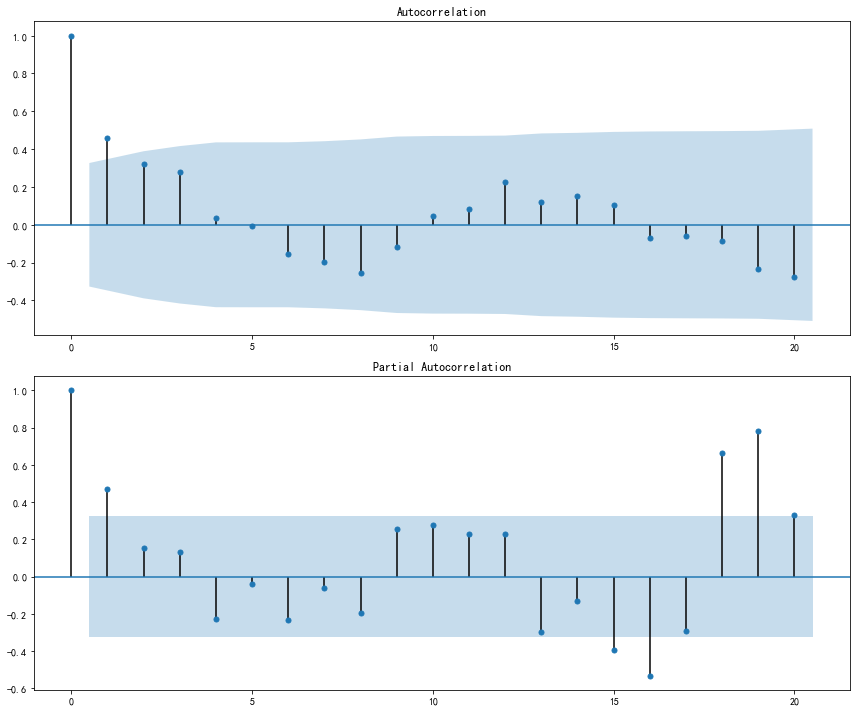

In [42]:
#原始数据ACF和PACF图
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [43]:
#差分
df['电量diff1'] = df['电量'].diff(1)
df['电量diff2'] = df['电量diff1'].diff(1)

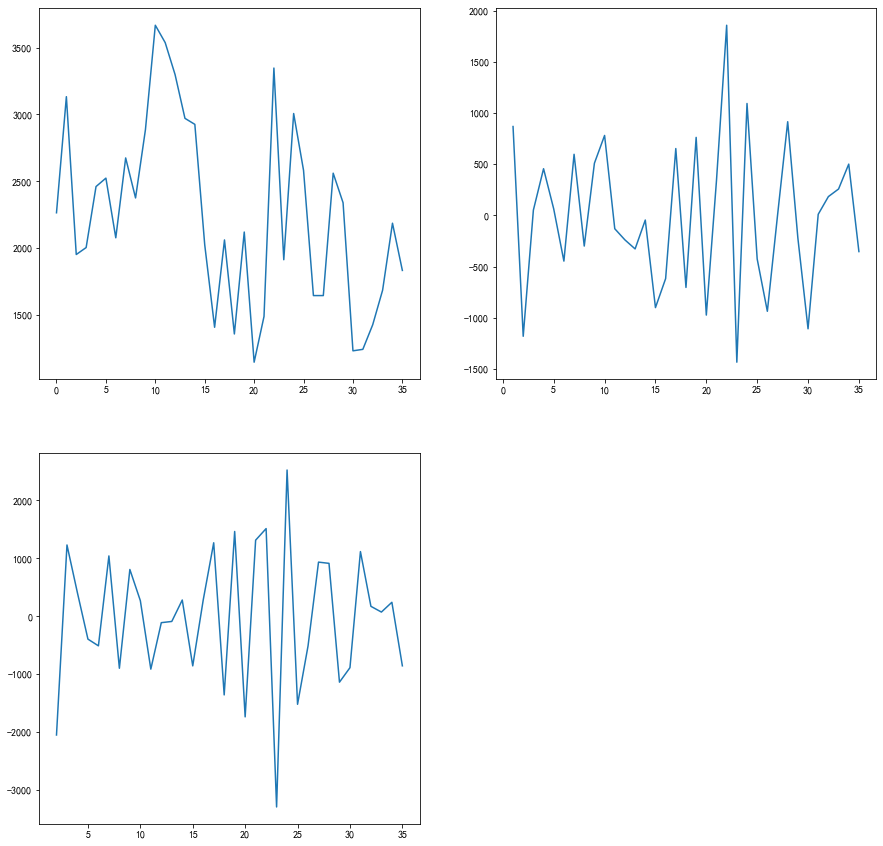

In [44]:
#差分后的时序图与原始图对比
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.plot(df['电量'])
ax2 = fig.add_subplot(222)
ax2.plot(df['电量diff1'])
ax3 = fig.add_subplot(223)
ax3.plot(df['电量diff2'])
plt.show()

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


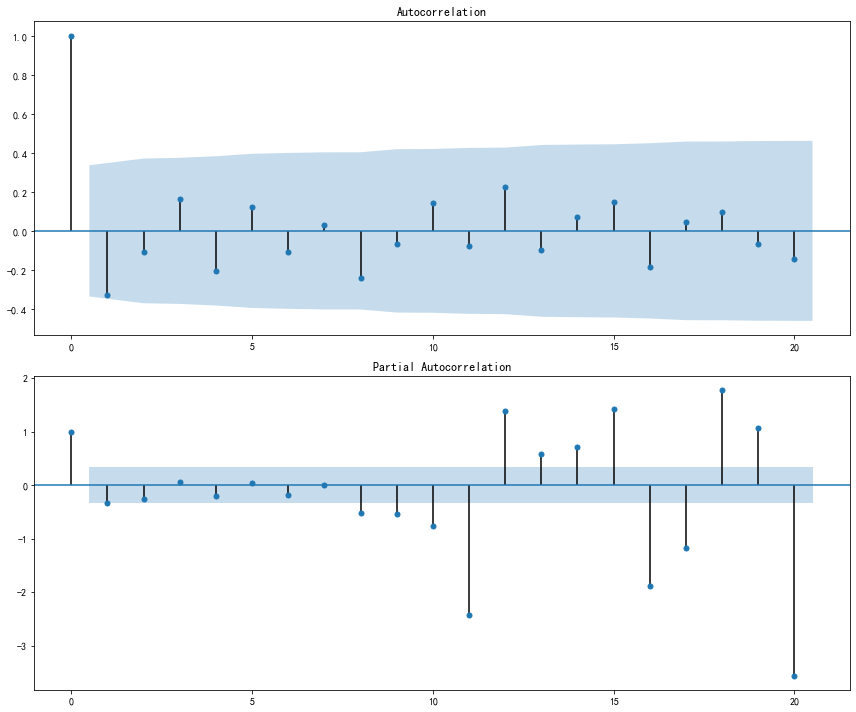

In [45]:
#一阶差分后的ACF 和 PACF图
df=df.dropna()
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量diff1'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量diff1'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [46]:
#模型定阶
df['电量']=df['电量'].astype(float)
pmax=int(len(df['电量'])/10)
qmax=int(len(df['电量'])/10)
bic_matrix=[]

#循环函数找最优参数
from statsmodels.tsa.arima_model import ARIMA
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(df['电量'],(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

#使用最优参数建模
bic_matrix=pd.DataFrame(bic_matrix)
p,q=bic_matrix.stack().idxmin()
bic_matrix
model=ARIMA(df['电量'],(p,1,q)).fit()
model.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasti

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.电量   No. Observations:                   33
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -259.974
Method:                       css-mle   S.D. of innovations            636.232
Date:                Tue, 12 Jan 2021   AIC                            525.947
Time:                        14:41:03   BIC                            530.437
Sample:                             1   HQIC                           527.458
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4217     62.233     -0.103      0.918    -128.395     115.552
ma.L1.D.电量    -0.4536      0.175     -2.593      0.010      -0.797      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.2046           +0.0000j            2.2046            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
#预测
model.forecast(4)

(array([1856.43391172, 1850.01220101, 1843.59049031, 1837.1687796 ]),
 array([636.23156514, 725.00977048, 804.04460703, 875.97733583]),
 array([[ 609.44295821, 3103.42486523],
        [ 429.01916244, 3271.00523959],
        [ 267.69201857, 3419.48896204],
        [ 120.28475009, 3554.0528091 ]]))

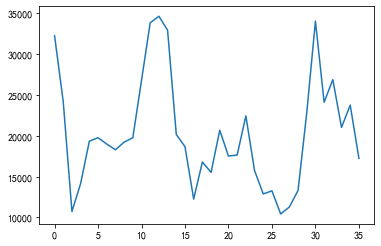

In [13]:
#餐饮业原始数据时序图
df = pd.read_excel('餐饮业时间序列.xlsx')
plt.plot(df['电量'])

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


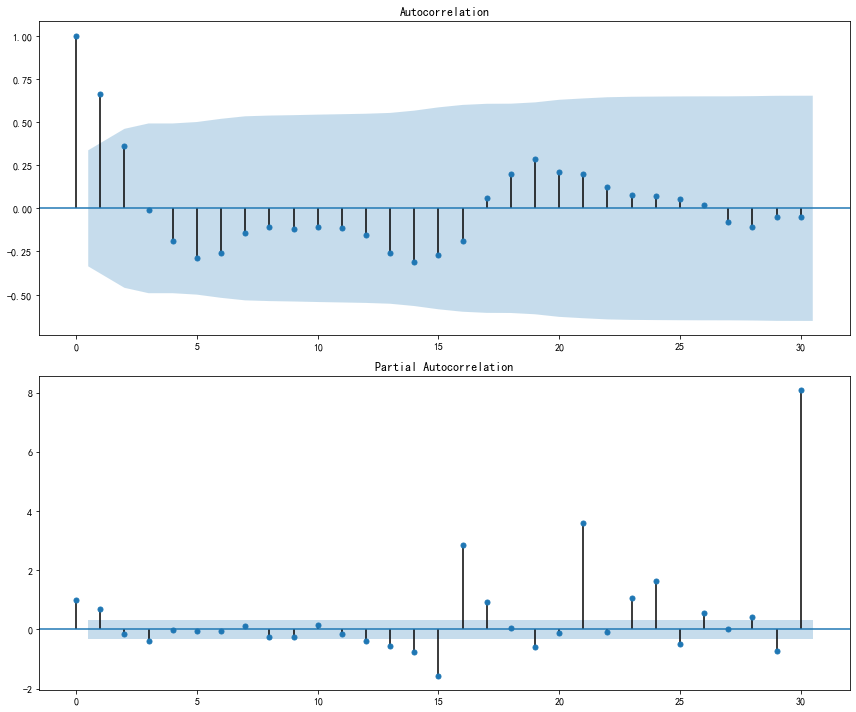

In [18]:
#原始数据ACF和PACF图
df=df.dropna()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量'], lags=30,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量'], lags=30, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [19]:
#差分
df['电量diff1'] = df['电量'].diff(1)
df['电量diff2'] = df['电量diff1'].diff(1)
df['电量diff12'] = df['电量'].diff(12)

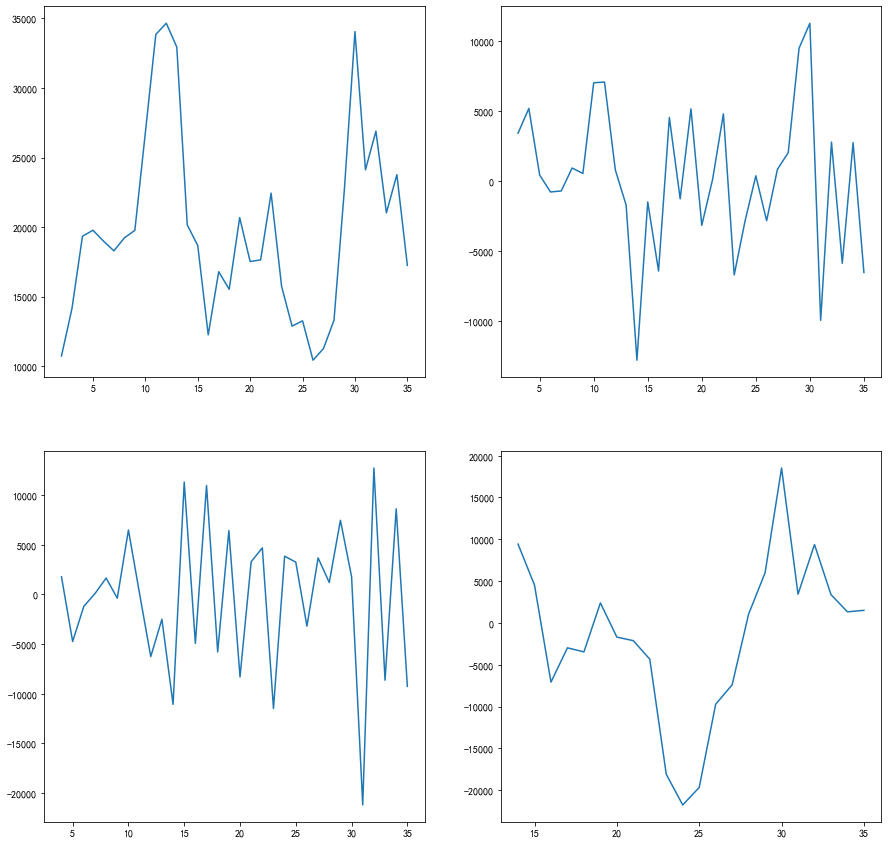

In [20]:
#差分后的时序图与原始图对比
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.plot(df['电量'])
ax2 = fig.add_subplot(222)
ax2.plot(df['电量diff1'])
ax3 = fig.add_subplot(223)
ax3.plot(df['电量diff2'])
ax4 = fig.add_subplot(224)
ax4.plot(df['电量diff12'])
plt.show()

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


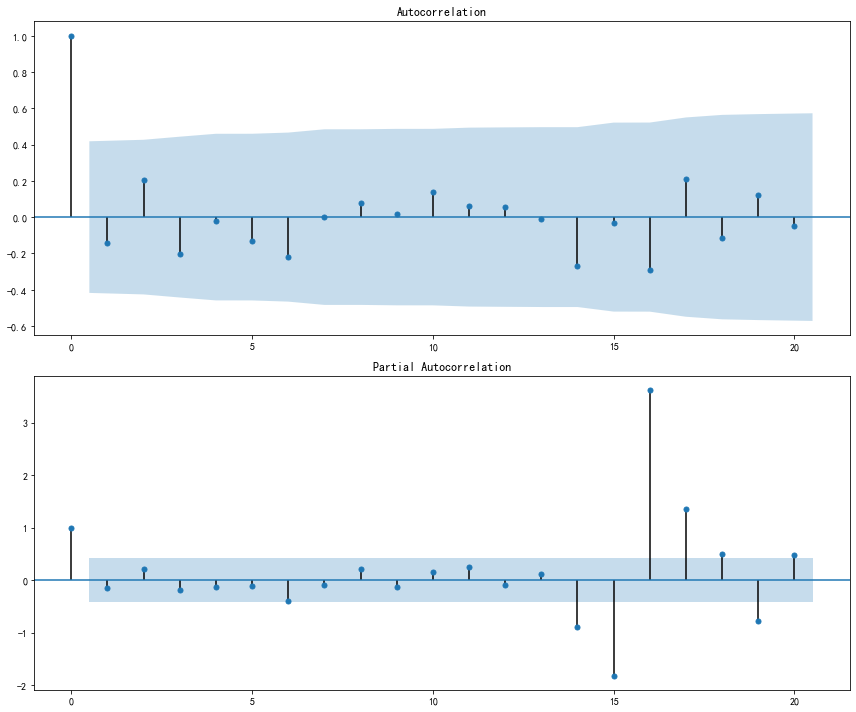

In [22]:
#一阶差分后的ACF 和 PACF图
df=df.dropna()
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量diff1'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量diff1'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [24]:
#模型定阶
df['电量']=df['电量'].astype(float)
pmax=int(len(df['电量'])/10)
qmax=int(len(df['电量'])/10)
bic_matrix=[]

#循环函数找最优参数
from statsmodels.tsa.arima_model import ARIMA
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(df['电量'],(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

#使用最优参数建模
bic_matrix=pd.DataFrame(bic_matrix)
p,q=bic_matrix.stack().idxmin()
bic_matrix
model=ARIMA(df['电量'],(p,1,q)).fit()
model.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasti

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.电量   No. Observations:                   21
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -210.038
Method:                           css   S.D. of innovations           5339.417
Date:                Tue, 12 Jan 2021   AIC                            424.076
Time:                        14:31:28   BIC                            426.165
Sample:                             1   HQIC                           424.529
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.8571   1165.156     -0.119      0.905   -2422.521    2144.807
==============================================================================
"""

In [25]:
#预测
model.forecast(4)

(array([17101.14285714, 16962.28571429, 16823.42857143, 16684.57142857]),
 array([ 5339.41686031,  7551.07573901,  9248.14128485, 10678.83372062]),
 array([[ 6636.07811249, 27566.2076018 ],
        [ 2162.44922128, 31762.12220729],
        [-1302.59527081, 34949.45241367],
        [-4245.55806074, 37614.70091788]]))

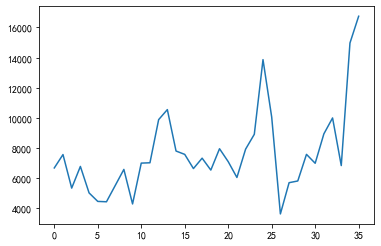

In [26]:
#住宿原始数据时序图
df = pd.read_excel('住宿时间序列.xlsx')
plt.plot(df['电量'])

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


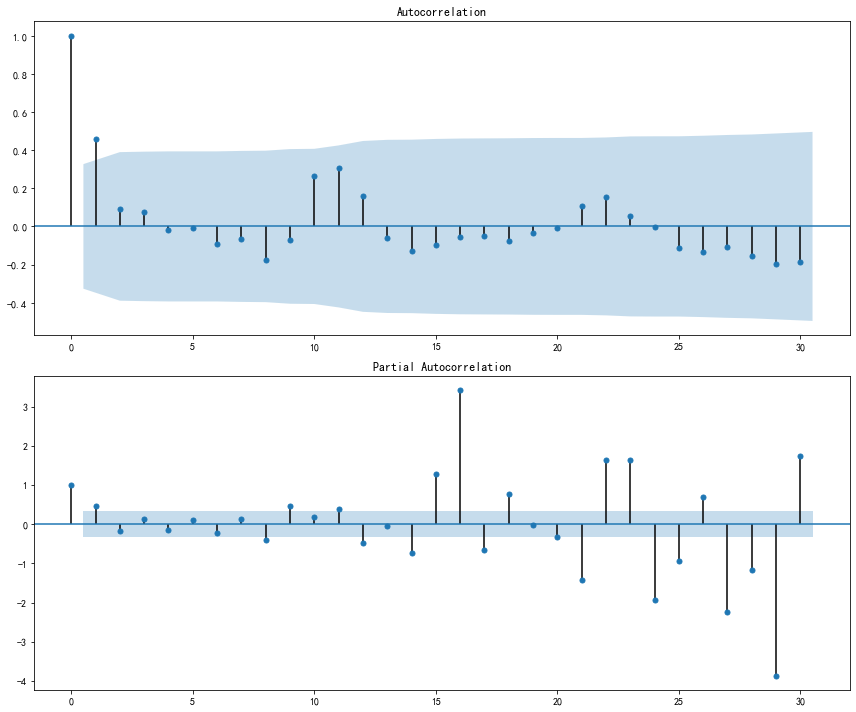

In [27]:
#原始数据ACF和PACF图
df=df.dropna()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量'], lags=30,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量'], lags=30, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [28]:
#差分
df['电量diff1'] = df['电量'].diff(1)
df['电量diff2'] = df['电量diff1'].diff(1)
df['电量diff12'] = df['电量'].diff(12)

#差分后的时序图与原始图对比
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.plot(df['电量'])
ax2 = fig.add_subplot(222)
ax2.plot(df['电量diff1'])
ax3 = fig.add_subplot(223)
ax3.plot(df['电量diff2'])
ax4 = fig.add_subplot(224)
ax4.plot(df['电量diff12'])
plt.show()

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


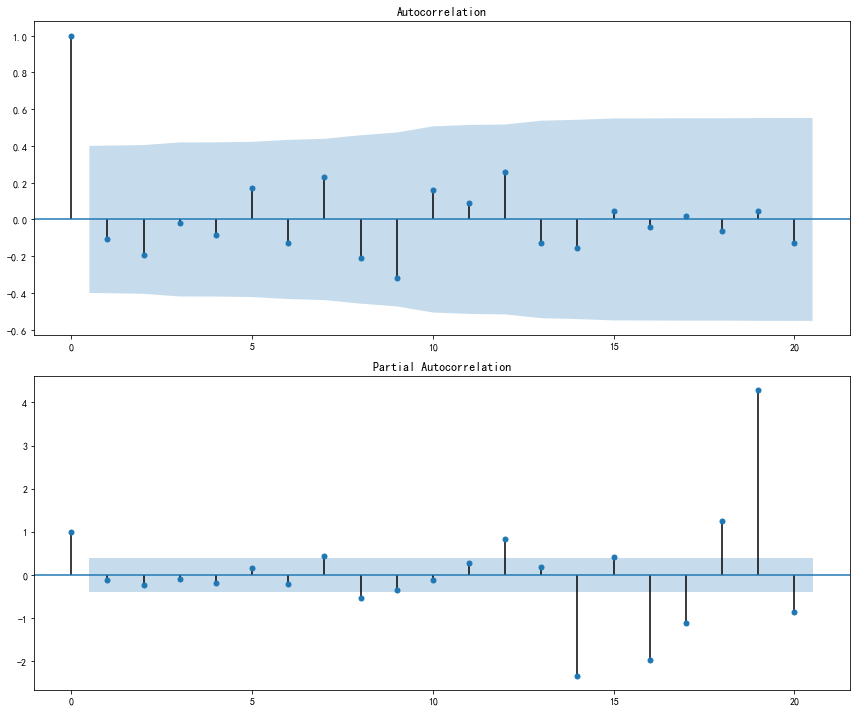

In [30]:
#一阶差分后的ACF 和 PACF图
df=df.dropna()
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量diff1'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量diff1'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [31]:
#模型定阶
df['电量']=df['电量'].astype(float)
pmax=int(len(df['电量'])/10)
qmax=int(len(df['电量'])/10)
bic_matrix=[]

#循环函数找最优参数
from statsmodels.tsa.arima_model import ARIMA
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(df['电量'],(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

#使用最优参数建模
bic_matrix=pd.DataFrame(bic_matrix)
p,q=bic_matrix.stack().idxmin()
bic_matrix
model=ARIMA(df['电量'],(p,1,q)).fit()
model.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasti

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.电量   No. Observations:                   23
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -215.694
Method:                           css   S.D. of innovations           2861.448
Date:                Tue, 12 Jan 2021   AIC                            435.389
Time:                        14:35:11   BIC                            437.660
Sample:                             1   HQIC                           435.960
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        298.0000    596.653      0.499      0.617    -871.419    1467.419
==============================================================================
"""

In [32]:
#预测
model.forecast(4)

(array([17042., 17340., 17638., 17936.]),
 array([2861.4477333 , 4046.69819246, 4956.17285729, 5722.89546661]),
 array([[11433.66549908, 22650.33450092],
        [ 9408.61728647, 25271.38271353],
        [ 7924.07969856, 27351.92030144],
        [ 6719.33099816, 29152.66900184]]))

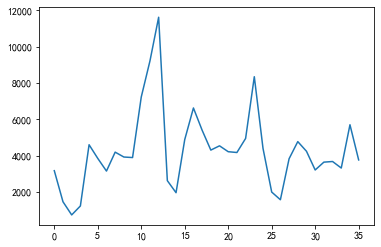

In [33]:
#交通原始数据时序图
df = pd.read_excel('交通时间序列.xlsx')
plt.plot(df['电量'])

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


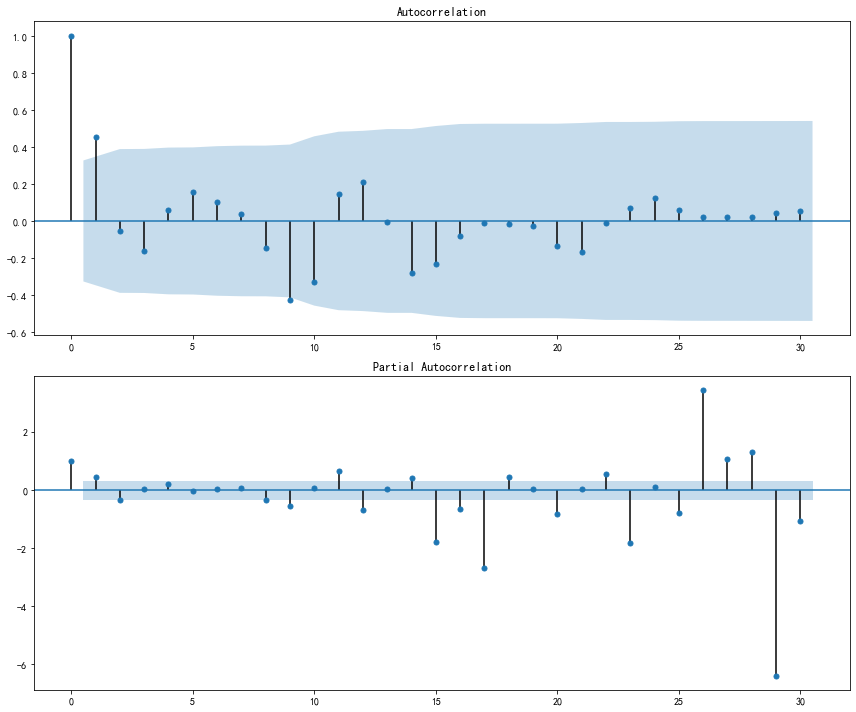

In [34]:
#原始数据ACF和PACF图
df=df.dropna()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量'], lags=30,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量'], lags=30, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

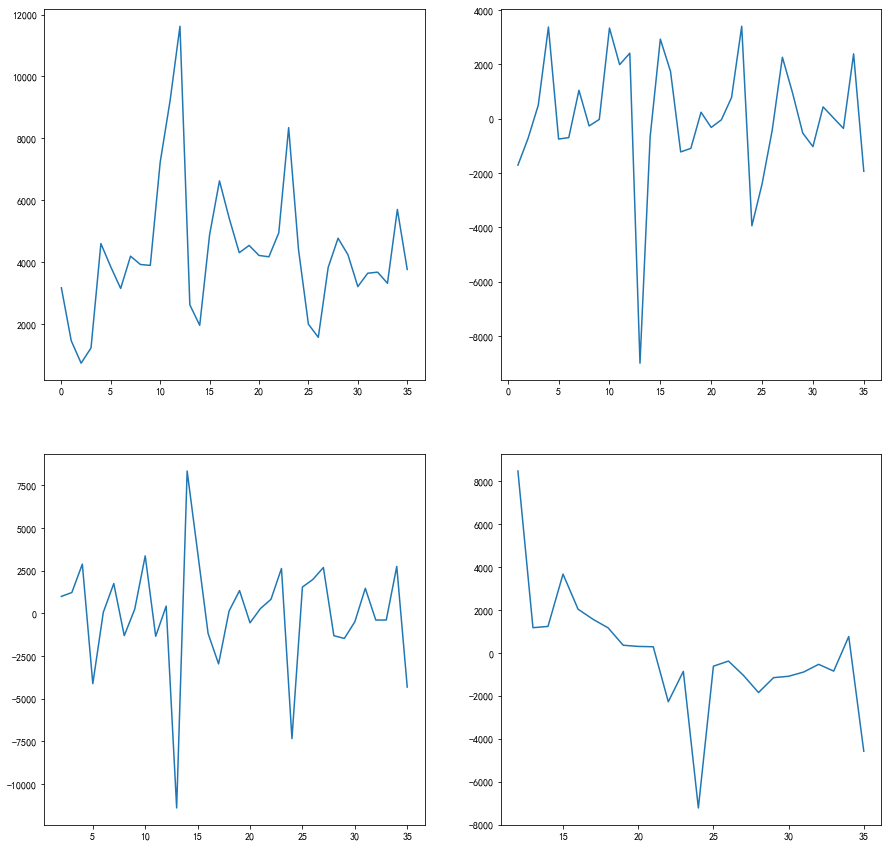

In [35]:
#差分
df['电量diff1'] = df['电量'].diff(1)
df['电量diff2'] = df['电量diff1'].diff(1)
df['电量diff12'] = df['电量'].diff(12)

#差分后的时序图与原始图对比
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.plot(df['电量'])
ax2 = fig.add_subplot(222)
ax2.plot(df['电量diff1'])
ax3 = fig.add_subplot(223)
ax3.plot(df['电量diff2'])
ax4 = fig.add_subplot(224)
ax4.plot(df['电量diff12'])
plt.show()

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


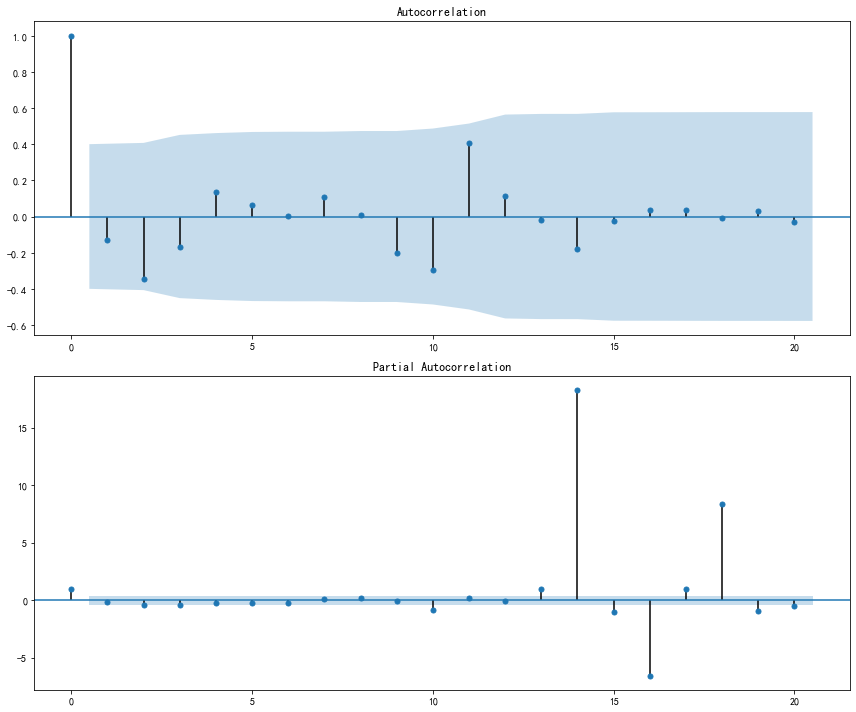

In [36]:
#一阶差分后的ACF 和 PACF图
df=df.dropna()
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['电量diff1'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['电量diff1'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [39]:
#模型定阶
df['电量']=df['电量'].astype(float)
pmax=int(len(df['电量'])/10)
qmax=int(len(df['电量'])/10)
bic_matrix=[]

#循环函数找最优参数
from statsmodels.tsa.arima_model import ARIMA
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(df['电量'],(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

#使用最优参数建模
bic_matrix=pd.DataFrame(bic_matrix)
p,q=bic_matrix.stack().idxmin()
bic_matrix
model=ARIMA(df['电量'],(p,1,q)).fit()
model.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasti

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.电量   No. Observations:                   23
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -204.511
Method:                       css-mle   S.D. of innovations           1554.681
Date:                Tue, 12 Jan 2021   AIC                            419.023
Time:                        14:39:25   BIC                            424.700
Sample:                             1   HQIC                           420.450
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.9551     37.446     -2.669      0.008    -173.349     -26.562
ar.L1.D.电量     0.3272      0.227      1.442      0.149      -0.117       0.772
ar.L2.D.电量    -0.7729      0.174     -4.450      0.000      -1.113      -0.432
ma.L1.D.电量    -1.0000      0.131     -7.607      0.000      -1.258      -0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2117           -1.1176j            1.1375           -0.2202
AR.2            0.2117           +1.1176j            1.1375            0.2202
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
#预测
model.forecast(4)

(array([1541.2513514 , 2169.08054265, 3945.55261462, 3897.04296942]),
 array([1554.68108683, 1635.7764025 , 1935.7873017 , 2069.49186214]),
 array([[-1505.86758624,  4588.37028903],
        [-1036.98229301,  5375.14337831],
        [  151.47922157,  7739.62600768],
        [ -159.08654667,  7953.17248551]]))